<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2011/Assignment%2011%20temp%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
# os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

# os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
!git pull origin master
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 35 (delta 23), reused 26 (delta 14), pack-reused 0
Unpacking objects: 100% (35/35), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch            master     -> FETCH_HEAD
   990fed5..526fee5  master     -> origin/master
Updating 990fed5..526fee5
Fast-forward
 Session 10/asgnmt10/ModelPerformance.py               |  16 ++++++++--------
 Session 11/asgnmt11/ModelPerformance.py               |  15 +++++++--------
 .../asgnmt11/__pycache__/LR_Finder_acc.cpython-37.pyc | Bin 0 -> 20655 bytes
 .../asgnmt11/__pycache__/LR_Min_Max.cpython-37.pyc    | Bin 0 -> 1682 bytes
 .../__pycache__/Training_Testing.cpython-37.pyc       | Bin 2326 -> 2326 bytes
 .../assignment11_model_DropOut.cpython-37.pyc         | Bin 0 -> 1802 bytes
 .../__pycache__/DataTransformation.cpython-37.pyc     | Bin 0 -> 1759 bytes
 Session 6/Modules/__pycache

In [13]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model_DropOut import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [5]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Estimating LR Max


Learning rate search finished. See the graph with {finder_name}.plot()


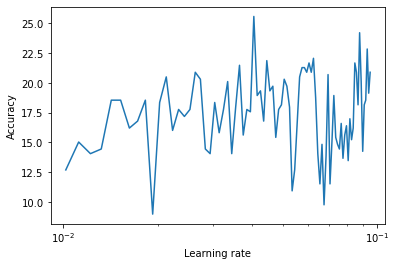

40    0.040464
Name: lr, dtype: float64

In [7]:
lr_max = LR_Max(net,trainloader,start = 1e-4,end = 0.1,iters = 100,mode = 'linear')
lr_max

## Estimating LR Min


In [9]:

lr_min =  LR_Min(net,trainloader,lr_max)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.8259855508804321 Batch_id=97 Accuracy=29.76: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.6172221899032593 Batch_id=97 Accuracy=41.06: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.2880427837371826 Batch_id=97 Accuracy=48.34: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.0957105159759521 Batch_id=97 Accuracy=54.57: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.1160666942596436 Batch_id=97 Accuracy=57.50: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.196189522743225 Batch_id=97 Accuracy=61.24: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.015097975730896 Batch_id=97 Accuracy=63.95: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=0.9664040803909302 Batch_id=97 Accuracy=65.60: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.9796662330627441 Batch_id=97 Accuracy=67.72: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=0.7705700397491455 Batch_id=97 Accuracy=69.07: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.7868344187736511 Batch_id=97 Accuracy=70.86: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.9065372943878174 Batch_id=97 Accuracy=72.00: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=0.7994168400764465 Batch_id=97 Accuracy=72.45: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.7422420978546143 Batch_id=97 Accuracy=73.41: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=0.7555336952209473 Batch_id=97 Accuracy=74.82: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.7055132389068604 Batch_id=97 Accuracy=75.16: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.7636186480522156 Batch_id=97 Accuracy=76.25: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=0.6205272078514099 Batch_id=97 Accuracy=76.81: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.6357027292251587 Batch_id=97 Accuracy=77.18: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=0.6150450110435486 Batch_id=97 Accuracy=77.76: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.6417456269264221 Batch_id=97 Accuracy=78.53: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.5715008974075317 Batch_id=97 Accuracy=79.19: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=0.6246749758720398 Batch_id=97 Accuracy=79.23: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.6947975158691406 Batch_id=97 Accuracy=79.41: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=0.5312486886978149 Batch_id=97 Accuracy=80.14: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.5409107804298401 Batch_id=97 Accuracy=80.46: 100%|██████████| 98/98 [01:58<00:00,  1.21s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.5830037593841553 Batch_id=97 Accuracy=80.94: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=0.6011275053024292 Batch_id=97 Accuracy=80.94: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.5924749970436096 Batch_id=97 Accuracy=81.64: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=0.5166149139404297 Batch_id=97 Accuracy=81.63: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]


In [10]:
print('LR Min is ',lr_min)


LR Min is  0.004046363636363637


In [11]:
net = Net().to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          pct_start = 5/24, # 5/24
                                          epochs =24,
                                          steps_per_epoch=len(trainloader),
                                          div_factor = lr_max.values[0]/lr_min,
                                          final_div_factor = 1)

# net = Net().to(device)
for epoch in range(24):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5481923818588257 Batch_id=97 Accuracy=31.05: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5566, Accuracy: 4414/10000 (44.14%)

EPOCH: 1


Loss=1.3781718015670776 Batch_id=97 Accuracy=44.78: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2185, Accuracy: 5644/10000 (56.44%)

EPOCH: 2


Loss=1.1587984561920166 Batch_id=97 Accuracy=54.13: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0518, Accuracy: 6198/10000 (61.98%)

EPOCH: 3


Loss=1.0726691484451294 Batch_id=97 Accuracy=58.52: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9556, Accuracy: 6782/10000 (67.82%)

EPOCH: 4


Loss=1.1092890501022339 Batch_id=97 Accuracy=62.60: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8461, Accuracy: 7030/10000 (70.30%)

EPOCH: 5


Loss=1.0586553812026978 Batch_id=97 Accuracy=65.07: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7809, Accuracy: 7416/10000 (74.16%)

EPOCH: 6


Loss=0.9883930683135986 Batch_id=97 Accuracy=67.32: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6560, Accuracy: 7764/10000 (77.64%)

EPOCH: 7


Loss=0.8838548064231873 Batch_id=97 Accuracy=68.48: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6485, Accuracy: 7867/10000 (78.67%)

EPOCH: 8


Loss=0.8528043627738953 Batch_id=97 Accuracy=69.72: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6026, Accuracy: 7964/10000 (79.64%)

EPOCH: 9


Loss=0.9075591564178467 Batch_id=97 Accuracy=71.80: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6383, Accuracy: 7838/10000 (78.38%)

EPOCH: 10


Loss=0.7645782232284546 Batch_id=97 Accuracy=72.19: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5896, Accuracy: 8012/10000 (80.12%)

EPOCH: 11


Loss=0.7900578379631042 Batch_id=97 Accuracy=73.82: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6288, Accuracy: 7917/10000 (79.17%)

EPOCH: 12


Loss=0.7594816088676453 Batch_id=97 Accuracy=74.80: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5259, Accuracy: 8228/10000 (82.28%)

EPOCH: 13


Loss=0.6960437297821045 Batch_id=97 Accuracy=75.76: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5561, Accuracy: 8215/10000 (82.15%)

EPOCH: 14


Loss=0.6413646340370178 Batch_id=97 Accuracy=75.94: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4914, Accuracy: 8292/10000 (82.92%)

EPOCH: 15


Loss=0.7305365800857544 Batch_id=97 Accuracy=76.77: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5405, Accuracy: 8209/10000 (82.09%)

EPOCH: 16


Loss=0.6480279564857483 Batch_id=97 Accuracy=77.29: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4881, Accuracy: 8345/10000 (83.45%)

EPOCH: 17


Loss=0.7227913737297058 Batch_id=97 Accuracy=78.43: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4851, Accuracy: 8398/10000 (83.98%)

EPOCH: 18


Loss=0.7501642107963562 Batch_id=97 Accuracy=78.44: 100%|██████████| 98/98 [01:57<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4780, Accuracy: 8436/10000 (84.36%)

EPOCH: 19


Loss=0.6147778034210205 Batch_id=97 Accuracy=79.10: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4213, Accuracy: 8591/10000 (85.91%)

EPOCH: 20


Loss=0.5475558042526245 Batch_id=97 Accuracy=79.83: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4232, Accuracy: 8547/10000 (85.47%)

EPOCH: 21


Loss=0.6113353371620178 Batch_id=97 Accuracy=79.89: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4176, Accuracy: 8623/10000 (86.23%)

EPOCH: 22


Loss=0.5304909348487854 Batch_id=97 Accuracy=80.46: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4041, Accuracy: 8661/10000 (86.61%)

EPOCH: 23


Loss=0.5887290239334106 Batch_id=97 Accuracy=81.03: 100%|██████████| 98/98 [01:56<00:00,  1.19s/it]



Test set: Average loss: 0.3991, Accuracy: 8671/10000 (86.71%)

Finished Training


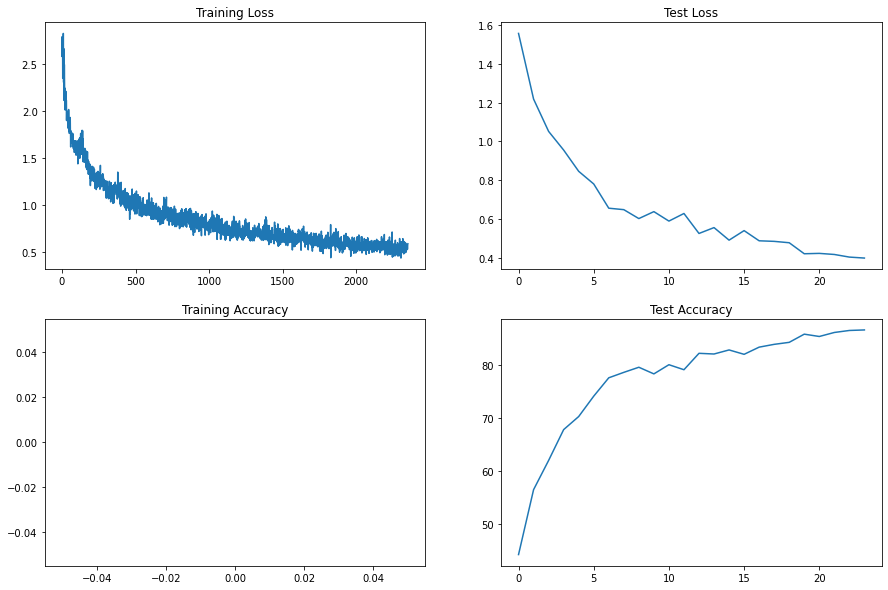

In [14]:
PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 86 %
Accuracy of plane : 85 %
Accuracy of   car : 100 %
Accuracy of  bird : 85 %
Accuracy of   cat : 58 %
Accuracy of  deer : 71 %
Accuracy of   dog : 66 %
Accuracy of  frog : 72 %
Accuracy of horse : 100 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %


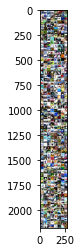

In [16]:
classes = ('plane', 'car', 'bird', 'cat',
        'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
ViewModelPerformance(testloader,net,classes,device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


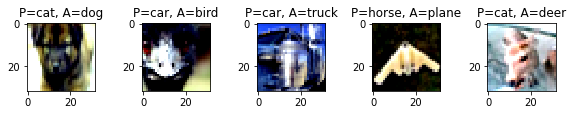

In [17]:
wrong = Misclassification(testloader,net,classes,device)